# Extract Data from SEC

In [1]:
!pip install selenium

     |████████████████████████████████| 904 kB 4.0 MB/s eta 0:00:01


In [6]:
!pip install webdriver_manager

In [ ]:
#!wget -O /tmp/chromedriver.zip https://chromedriver.storage.googleapis.com/92.0.4515.107/chromedriver_linux64.zip && sudo unzip /tmp/chromedriver.zip chromedriver -d /home/dada/

In [18]:
#!sudo rm /usr/bin/chromedriver
#!sudo ln -s /home/dada/chromedriver /usr/bin/chromedriver

In [ ]:
#nano ~/.bashrc
#add line: export PATH="$/home/dada/:$PATH" 
#source .bashrc
#echo $PATH

In [1]:
import pandas as pd
import numpy as np
import time, sys, os, re
import datetime, pickle
import getpass
from tqdm import tqdm
import datetime
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
import csv
import time
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import os 
from bs4 import BeautifulSoup 
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import StaleElementReferenceException

In [299]:
comp = pd.read_excel('LIST OF PUBLICLY TRADED US COMPANIES (7).xlsx')

In [300]:
print(comp.shape)
comp.head() #need last available market capital

(27939, 31)


,Symbol,Name,Unnamed: 2,FREF ENTITY INCORP DATE,Primary Equity Listing,Company is Active,Listing Status,Bankruptcy Status,Extinct Status,FactSet Ind,...,MktVal Co 2014,MktVal Co 2013,MktVal Co 2012,MktVal Co 2011,MktVal Co 2010,MktVal Co 2009,MktVal Co 2008,MktVal Co 2007,MktVal Co 2006,MktVal Co 2005
0,CTAC.1,"1-800 Contacts, Inc.",United States,1997.0,68197710,0,1,@NA,@NA,Medical Distributors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.764053,156.077999
1,ATTY,"1-800-Attorney, Inc.",United States,1993.0,68231A20,0,1,@NA,@NA,Publishing: Books/Magazines,...,NaN,0.191550,0.19155,1.149300,0.766200,1.14930,0.038310,1.628175,3.299175,6.406785
2,FLWS,"1-800-FLOWERS.COM, Inc. Class A",United States,1992.0,68243Q10,1,0,@NA,@NA,Internet Retail,...,528.238313,348.234085,238.14801,143.102225,172.110142,168.20999,242.720751,549.959115,401.425418,417.636832
3,TXG,10x Genomics Inc Class A,United States,2012.0,88025U10,1,0,@NA,@NA,Biotechnology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELVN,"11 Good Energy, Inc.",United States,NaN,28623610,0,1,@NA,@NA,Chemicals: Specialty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
comp = comp[comp['Unnamed: 2'] == "United States"]

In [302]:
comp.shape

(26697, 31)

In [303]:
comp.columns

Index(['Symbol', 'Name', 'Unnamed: 2', 'FREF ENTITY INCORP DATE',
       'Primary Equity Listing', 'Company is Active', 'Listing Status',
       'Bankruptcy Status', 'Extinct Status', 'FactSet Ind', 'NAICS Code',
       'Entity NAICS Sector Number', 'FREF ENTITY INCORP DATE.1',
       'Date (FIRST)', 'Date (RT Last)', 'MktVal Co 2020', 'MktVal Co 2019',
       'MktVal Co 2018', 'MktVal Co 2017', 'MktVal Co 2016', 'MktVal Co 2015',
       'MktVal Co 2014', 'MktVal Co 2013', 'MktVal Co 2012', 'MktVal Co 2011',
       'MktVal Co 2010', 'MktVal Co 2009', 'MktVal Co 2008', 'MktVal Co 2007',
       'MktVal Co 2006', 'MktVal Co 2005'],
      dtype='object')

In [304]:
#drop rows with all NA in market values
MrkVal_col = ['MktVal Co 2019', 'MktVal Co 2018', 'MktVal Co 2017', 'MktVal Co 2016', 'MktVal Co 2015',
       'MktVal Co 2014', 'MktVal Co 2013', 'MktVal Co 2012', 'MktVal Co 2011', 'MktVal Co 2010']

In [305]:
comp = comp[comp[MrkVal_col].isnull().apply(lambda x: all(x) == False, axis=1)] 
comp.shape

(13304, 31)

In [306]:
# #limited to US
# comp = comp[(comp['Unnamed: 2'] == 'United States') & (comp['Company is Active'] == 1)]
# comp.shape

In [307]:
print(comp.shape)
comp.tail() #need last available market capital

(13304, 31)


,Symbol,Name,Unnamed: 2,FREF ENTITY INCORP DATE,Primary Equity Listing,Company is Active,Listing Status,Bankruptcy Status,Extinct Status,FactSet Ind,...,MktVal Co 2014,MktVal Co 2013,MktVal Co 2012,MktVal Co 2011,MktVal Co 2010,MktVal Co 2009,MktVal Co 2008,MktVal Co 2007,MktVal Co 2006,MktVal Co 2005
27925,ZIGO,Zygo Corporation,United States,1970.0,98985510,0,1,@NA,@NA,Electronic Components,...,NaN,276.725929,289.445209,315.529057,215.232496,113.986012,116.157094,224.45444,303.222873,264.948822
27926,ZCOR,Zyla Life Sciences,United States,2013.0,98986F10,1,1,BANKRUPT,@NA,Pharmaceuticals: Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27930,ZYNE,Zynerba Pharmaceuticals Inc,United States,2007.0,98986X10,1,0,@NA,@NA,Pharmaceuticals: Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27931,ZYXI,"Zynex, Inc.",United States,2001.0,98986M10,1,0,@NA,@NA,Medical Specialties,...,5.159715,11.524760,21.791073,20.955560,18.357000,32.211279,46.270597,34.33216,6.488040,10.897420
27932,ZNGA,Zynga Inc. Class A,United States,2007.0,98986T10,1,0,@NA,@NA,Internet Software/Services,...,2401.038357,3064.479606,1826.665878,6588.985403,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
#ftp.nasdaqtrader.com/SymbolDirectory ftp.nasdaqtrader.com/SymbolDirectory/nasdaqlisted.txt ftp.nasdaqtrader.com/SymbolDirectory/otherlisted.txt 
nasdaq = pd.read_csv("nasdaqlisted.txt", delimiter = '|')

In [309]:
nasdaq.head()

,Symbol,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size,ETF,NextShares
0,AACG,ATA Creativity Global - American Depositary Sh...,G,N,N,100.0,N,N
1,AADR,AdvisorShares Dorsey Wright ADR ETF,G,N,N,100.0,Y,N
2,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,100.0,N,N
3,AAME,Atlantic American Corporation - Common Stock,G,N,N,100.0,N,N
4,AAOI,"Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0,N,N


In [310]:
nasdaq_ticker = nasdaq.Symbol[nasdaq.ETF == "N"]

In [311]:
len(nasdaq_ticker) #4477

4477

In [312]:
other = pd.read_csv("otherlisted.txt", delimiter = '|')

In [313]:
other.head()

,ACT Symbol,Security Name,Exchange,CQS Symbol,ETF,Round Lot Size,Test Issue,NASDAQ Symbol
0,A,"Agilent Technologies, Inc. Common Stock",N,A,N,100.0,N,A
1,AA,Alcoa Corporation Common Stock,N,AA,N,100.0,N,AA
2,AAA,Listed Funds Trust AAF First Priority CLO Bond...,P,AAA,Y,100.0,N,AAA
3,AAAU,Goldman Sachs Physical Gold ETF Shares,P,AAAU,Y,100.0,N,AAAU
4,AAC,Ares Acquisition Corporation Class A Ordinary ...,N,AAC,N,100.0,N,AAC


In [467]:
other.Exchange.value_counts()


N    3598
P    1692
Z     511
A     314
V       3
Name: Exchange, dtype: int64

In [314]:

nyse_ticker = other['ACT Symbol'][other.Exchange == 'N']

In [315]:
len(nyse_ticker)

3598

In [316]:
comp["Exchange"] = np.where(comp.Symbol.isin(nasdaq_ticker), "NASDAQ", np.where(comp.Symbol.isin(nyse_ticker), "NYSE", "OTHERS"))

In [317]:
comp.tail()

,Symbol,Name,Unnamed: 2,FREF ENTITY INCORP DATE,Primary Equity Listing,Company is Active,Listing Status,Bankruptcy Status,Extinct Status,FactSet Ind,...,MktVal Co 2013,MktVal Co 2012,MktVal Co 2011,MktVal Co 2010,MktVal Co 2009,MktVal Co 2008,MktVal Co 2007,MktVal Co 2006,MktVal Co 2005,Exchange
27925,ZIGO,Zygo Corporation,United States,1970.0,98985510,0,1,@NA,@NA,Electronic Components,...,276.725929,289.445209,315.529057,215.232496,113.986012,116.157094,224.45444,303.222873,264.948822,OTHERS
27926,ZCOR,Zyla Life Sciences,United States,2013.0,98986F10,1,1,BANKRUPT,@NA,Pharmaceuticals: Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHERS
27930,ZYNE,Zynerba Pharmaceuticals Inc,United States,2007.0,98986X10,1,0,@NA,@NA,Pharmaceuticals: Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NASDAQ
27931,ZYXI,"Zynex, Inc.",United States,2001.0,98986M10,1,0,@NA,@NA,Medical Specialties,...,11.524760,21.791073,20.955560,18.357000,32.211279,46.270597,34.33216,6.488040,10.897420,NASDAQ
27932,ZNGA,Zynga Inc. Class A,United States,2007.0,98986T10,1,0,@NA,@NA,Internet Software/Services,...,3064.479606,1826.665878,6588.985403,NaN,NaN,NaN,NaN,NaN,NaN,NASDAQ


In [318]:
comp.Exchange.value_counts()

OTHERS    9826
NASDAQ    2117
NYSE      1361
Name: Exchange, dtype: int64

In [319]:
#limit MA free companies to listed in NASDAQ and  NYSE
comp = comp[comp.Exchange.isin(['NASDAQ', "NYSE"])]

In [320]:
comp.Exchange.value_counts() #3786

NASDAQ    2117
NYSE      1361
Name: Exchange, dtype: int64

# Import M&A data

In [321]:
ma = pd.read_csv("M_A.csv")

In [573]:
print(ma.shape)
ma.head()

(1894, 18)


,Deal_ID,Target,Target_FactSet_Industry,Acquirer,Announcement_Date,Transaction_Status,Deal_Type,Transaction_Value,Enterprise_Value,Revenue_Target_LTM,EV_EBITDA,Target_Country,Target_Ticker,Target_Cusip,Target_Sedol,Target_Exchange,A_Date,Year
4,862251MM,"1st Century Bancshares, Inc. (California)",Major Banks,Midland Financial Co.; MidFirst Bank,10-Mar-16,Complete,Acquisition / Merger,115.98,172.09,23.61,-,United States,FCTY,31943X102,B00G7R3,NASDAQ,2016-03-10,2016
10,787548MM,"1st United Bancorp, Inc. (Florida)",Financial Conglomerates,Valley National Bancorp,8-May-14,Complete,Acquisition / Merger,299.65,279.78,87.16,-,United States,FUBC,33740N105,B2Q5S97,NASDAQ,2014-05-08,2014
22,3041212MM,8point3 Energy Partners LP,Electric Utilities,Capital Dynamics AG,5-Feb-18,Complete,Acquisition / Merger,"1,653.75","1,653.75",70.09,31.6,United States,CAFD,282539105,BZ0XXJ3,NASDAQ,2018-02-05,2018
23,578818MM,99 Cents Only Stores LLC,Specialty Stores,Leonard Green & Partners LP; 99? Only Stores /...,11-Mar-11,Cancelled,Acquisition / Merger,693.27,"1,134.72","1,384.65",8.05,United States,NDN,65440K106,2639930,NYSE,2011-03-11,2011
24,602545MM,99 Cents Only Stores LLC,Specialty Stores,Ares Owners Holdings LP; Government of Canada;...,11-Oct-11,Complete,Acquisition / Merger,"1,348.87","1,348.87","1,384.65",9.57,United States,NDN,65440K106,2639930,NYSE,2011-10-11,2011


In [323]:
ma.Target_Exchange.value_counts()

NASDAQ                            2267
OTC                               1909
NYSE                              1261
NYSE MKT LLC                       171
-                                  169
Toronto                             29
London Stock Exchange               26
TSX Venture Exchange                26
Australian Securities Exchange       7
Canadian Securities Exchange         5
NYSE Arca                            2
Norwegian OTC Market                 2
Aequitas NEO Exchange                1
New Zealand Exchange Ltd             1
BATS Exchange                        1
Stuttgart Stock Exchange             1
Name: Target_Exchange, dtype: int64

In [324]:
ma['A_Date'] = ma.Announcement_Date.apply(lambda x: str(datetime.strptime(x, '%d-%b-%y'))[:10])

In [325]:
ma['Year'] = [i[:4] for i in ma.A_Date]

<AxesSubplot:>

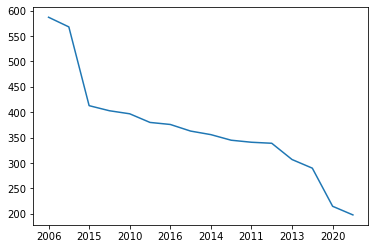

In [326]:
ma.Year.value_counts().plot()

In [327]:
ma = ma[(ma.Target_Exchange.isin(["NASDAQ", "NYSE"])) & (ma.Year>='2011') & (ma.Year<='2019') & (ma.Target_Country == 'United States')]

In [328]:
ma = ma.loc[['*' not in i for i in ma.Target_Ticker],:] #filter out Symbol has *
ma = ma.loc[[(i.isdecimal() == False) for i in ma.Target_Ticker],:] ##filter out all number Symbol

In [329]:
print(ma.shape)
ma.head() #75% in N

(1894, 18)


,Deal_ID,Target,Target_FactSet_Industry,Acquirer,Announcement_Date,Transaction_Status,Deal_Type,Transaction_Value,Enterprise_Value,Revenue_Target_LTM,EV_EBITDA,Target_Country,Target_Ticker,Target_Cusip,Target_Sedol,Target_Exchange,A_Date,Year
4,862251MM,"1st Century Bancshares, Inc. (California)",Major Banks,Midland Financial Co.; MidFirst Bank,10-Mar-16,Complete,Acquisition / Merger,115.98,172.09,23.61,-,United States,FCTY,31943X102,B00G7R3,NASDAQ,2016-03-10,2016
10,787548MM,"1st United Bancorp, Inc. (Florida)",Financial Conglomerates,Valley National Bancorp,8-May-14,Complete,Acquisition / Merger,299.65,279.78,87.16,-,United States,FUBC,33740N105,B2Q5S97,NASDAQ,2014-05-08,2014
22,3041212MM,8point3 Energy Partners LP,Electric Utilities,Capital Dynamics AG,5-Feb-18,Complete,Acquisition / Merger,"1,653.75","1,653.75",70.09,31.6,United States,CAFD,282539105,BZ0XXJ3,NASDAQ,2018-02-05,2018
23,578818MM,99 Cents Only Stores LLC,Specialty Stores,Leonard Green & Partners LP; 99? Only Stores /...,11-Mar-11,Cancelled,Acquisition / Merger,693.27,"1,134.72","1,384.65",8.05,United States,NDN,65440K106,2639930,NYSE,2011-03-11,2011
24,602545MM,99 Cents Only Stores LLC,Specialty Stores,Ares Owners Holdings LP; Government of Canada;...,11-Oct-11,Complete,Acquisition / Merger,"1,348.87","1,348.87","1,384.65",9.57,United States,NDN,65440K106,2639930,NYSE,2011-10-11,2011


In [330]:
ma.Target_FactSet_Industry.value_counts()

Regional Banks                     120
Packaged Software                  118
Pharmaceuticals: Major              85
Medical Specialties                 75
Semiconductors                      74
                                  ... 
Services to the Health Industry      1
Motor Vehicles                       1
Office Equipment/Supplies            1
Catalog/Specialty Distribution       1
Automotive Aftermarket               1
Name: Target_FactSet_Industry, Length: 124, dtype: int64

In [331]:
len(ma.Target_Ticker.unique())/len(ma) #11% duplicates by year

0.8922914466737064

In [332]:
#group announcement by Symbol and Year
ma_1 = ma.sort_values('A_Date').groupby(['Target_Ticker']).last().reset_index()

In [333]:
print(ma_1.shape)
ma_1.head()

(1690, 18)


,Target_Ticker,Deal_ID,Target,Target_FactSet_Industry,Acquirer,Announcement_Date,Transaction_Status,Deal_Type,Transaction_Value,Enterprise_Value,Revenue_Target_LTM,EV_EBITDA,Target_Country,Target_Cusip,Target_Sedol,Target_Exchange,A_Date,Year
0,AACC,749270MM,Asset Acceptance Capital Corp.,Finance/Rental/Leasing,"Encore Capital Group, Inc.",6-Mar-13,Complete,Acquisition / Merger,201.05,369.98,226.8,9.25,United States,04543P100,2321099,NASDAQ,2013-03-06,2013
1,AAN,778883MM,"Aaron's, Inc.",Finance/Rental/Leasing,Vintage Capital Management LLC,7-Feb-14,Cancelled,Acquisition / Merger,"2,105.26","2,168.92","2,255.13",2.2,United States,2535300,2002918,NYSE,2014-02-07,2014
2,AATI,587604MM,"Advanced Analogic Technologies, Inc.",Semiconductors,"Skyworks Solutions, Inc.",26-May-11,Complete,Acquisition / Merger,170.22,170.22,92.63,-14.41,United States,00752J108,B081P87,NASDAQ,2011-05-26,2011
3,ABAX,3054705MM,"Abaxis, Inc.",Medical Specialties,"Zoetis, Inc.",16-May-18,Complete,Acquisition / Merger,"1,731.78","1,731.78",244.7,37.11,United States,2567105,2011550,NASDAQ,2018-05-16,2018
4,ABBC,574055MM,"Abington Bancorp, Inc. (Pennsylvania)",Savings Banks,"Susquehanna Bancshares, Inc.",26-Jan-11,Complete,Acquisition / Merger,264.04,371.88,36.3,-,United States,00350L109,B1Z98S2,NASDAQ,2011-01-26,2011


In [334]:
ma_1.columns = [i.strip() for i in ma_1.columns]

In [335]:
ma_1.shape

(1690, 18)

In [336]:
pickle.dump(ma_1, open('ma_out.pkl', 'wb'))

# merge with market capital

In [375]:
comp_sub = comp[['Symbol','Name','FactSet Ind', 'NAICS Code','Entity NAICS Sector Number', 'MktVal Co 2019', 'MktVal Co 2018', 'MktVal Co 2017', 
                 'MktVal Co 2016', 'MktVal Co 2015', 'MktVal Co 2014', 'MktVal Co 2013', 'MktVal Co 2012', 'MktVal Co 2011', 'MktVal Co 2010']]       

In [376]:
ma_1_sub = ma_1[['Target_Ticker', 'Target','Year', 'A_Date', 'Enterprise_Value', 'Target_FactSet_Industry']]

In [377]:
share_ind = np.intersect1d(ma_1_sub.Target_FactSet_Industry.unique(), comp_sub['FactSet Ind'].unique())

In [378]:
comp_sub = comp_sub[comp_sub['FactSet Ind'].isin(share_ind)]
ma_1_sub = ma_1_sub[ma_1_sub['Target_FactSet_Industry'].isin(share_ind)]

In [379]:
ma_1_sub.shape

(1677, 6)

In [380]:
ma_1_sub = ma_1_sub[ma_1_sub.Target_FactSet_Industry == 'Regional Banks']
ma_1_sub.shape

(112, 6)

In [381]:
ma_1_sub.Target_FactSet_Industry.value_counts()

Regional Banks    112
Name: Target_FactSet_Industry, dtype: int64

In [367]:
cutoff_value = float(ma_1_sub.Enterprise_Value.max())

cutoff_value

99.07

In [382]:
comp_sub = comp_sub[comp_sub['FactSet Ind'] == 'Regional Banks']

comp_sub.shape

(257, 15)

In [369]:
comp_sub.head()


,Symbol,Name,FactSet Ind,NAICS Code,Entity NAICS Sector Number,MktVal Co 2019,MktVal Co 2018,MktVal Co 2017,MktVal Co 2016,MktVal Co 2015,MktVal Co 2014,MktVal Co 2013,MktVal Co 2012,MktVal Co 2011,MktVal Co 2010
25,FCCY,1st Constitution Bancorp,Regional Banks,522110,52,225.548960,171.517144,147.680988,149.282102,97.129895,77.700139,64.681199,50.080019,33.538902,39.144880
31,SRCE,1st Source Corporation,Regional Banks,522110,52,1323.394322,1047.468428,1282.535261,1155.220242,835.805296,818.705296,776.876685,536.323139,613.315307,489.868720
301,ACNB,ACNB Corporation,Regional Banks,522110,52,267.741357,276.398493,207.440994,189.406246,128.545492,130.739253,108.125217,96.448981,82.164029,93.010317
896,ABTX,"Allegiance Bancshares, Inc.",Regional Banks,522110,52,782.478682,710.133028,496.302326,466.515760,303.027439,NaN,NaN,NaN,NaN,NaN
996,ALLY,Ally Financial Inc,Regional Banks,522220,52,11439.585742,9175.033800,12894.143828,8969.794023,8979.857250,11339.820545,NaN,NaN,NaN,NaN


In [383]:

#subset comp_sub by dropping company with too high market value
comp_sub['In_sample'] = comp_sub[MrkVal_col].max(axis = 1)  < (5*cutoff_value)

In [384]:
sum(comp_sub.In_sample)

118

In [385]:
comp_sub = comp_sub[comp_sub.In_sample]

In [386]:
print(comp_sub.shape)
comp_sub.head()

(118, 16)


,Symbol,Name,FactSet Ind,NAICS Code,Entity NAICS Sector Number,MktVal Co 2019,MktVal Co 2018,MktVal Co 2017,MktVal Co 2016,MktVal Co 2015,MktVal Co 2014,MktVal Co 2013,MktVal Co 2012,MktVal Co 2011,MktVal Co 2010,In_sample
25,FCCY,1st Constitution Bancorp,Regional Banks,522110,52,225.548960,171.517144,147.680988,149.282102,97.129895,77.700139,64.681199,50.080019,33.538902,39.144880,True
301,ACNB,ACNB Corporation,Regional Banks,522110,52,267.741357,276.398493,207.440994,189.406246,128.545492,130.739253,108.125217,96.448981,82.164029,93.010317,True
1475,AMRB,American River Bankshares,Regional Banks,522110,55,87.733001,81.872548,97.185476,100.587269,77.699518,76.207802,82.734749,64.456479,45.004051,59.250000,True
1580,ASRV,"AmeriServ Financial, Inc.",Regional Banks,522110,55,71.983796,71.520413,75.837102,69.941100,60.387202,58.826470,56.915521,57.957547,41.355601,33.533922,True
1597,ATLO,Ames National Corporation,Regional Banks,551111,55,258.797363,236.685617,259.311350,307.262996,226.164195,241.527342,208.473281,203.910894,182.422491,204.413102,True


In [126]:
comp_sub.index = range(len(comp_sub))

In [4]:
#pickle.dump((comp_sub, ma_1_sub), open('comp_ma.pkl', 'wb'))
(comp_sub, ma_1_sub) = pickle.load(open('comp_ma.pkl', 'rb'))

In [5]:
comp_sub.shape

(118, 16)

In [6]:
ma_1_sub.index = range(len(ma_1_sub))
ma_1_sub.shape

(112, 6)

In [206]:
ma_missing = pd.read_csv("ma_missing.csv")
ma_missing.head()

,Target_Ticker,Target,Year,A_Date,Enterprise_Value,Target_FactSet_Industry,CIK
0,ALNC,ALLIANCE FINANCIAL CORP.,2012,2012-10-08,294.9,Regional Banks,796317
1,ANCB,Anchor Bancorp (Washington),2018,2018-07-17,96.04,Regional Banks,1448301
2,BKYF,Bank of Kentucky Financial Corp.,2014,2014-09-08,366.32,Regional Banks,934547
3,CARO,Carolina Financial Corp.,2019,2019-11-18,"1,567.84",Regional Banks,870385
4,CFCB,Centrue Financial Corp.,2017,2017-01-26,259.77,Regional Banks,891523


In [116]:
ma_missing['CIK'] = [str(i).zfill(10) for i in ma_missing.CIK]

In [117]:
print(ma_missing.shape)
ma_missing.head()

(32, 7)


,Target_Ticker,Target,Year,A_Date,Enterprise_Value,Target_FactSet_Industry,CIK
0,ALNC,ALLIANCE FINANCIAL CORP.,2012,2012-10-08,294.9,Regional Banks,0000796317
1,ANCB,Anchor Bancorp (Washington),2018,2018-07-17,96.04,Regional Banks,0001448301
2,BKYF,Bank of Kentucky Financial Corp.,2014,2014-09-08,366.32,Regional Banks,0000934547
3,CARO,Carolina Financial Corp.,2019,2019-11-18,"1,567.84",Regional Banks,0000870385
4,CFCB,Centrue Financial Corp.,2017,2017-01-26,259.77,Regional Banks,0000891523


# Webscaping 10-K SEC filing

In [ ]:
#for MA company, pull previous 9 years of 10-K if any
#for COMP company, pull 10-K between 2011 and 2019

In [556]:
######################################################
#################  Unit Test #########################
######################################################

In [405]:
driver.quit()

In [79]:
def name_input(comp_name):
    
    comp_name = comp_name.replace('Corporation', 'Corp')
    
    if "." in comp_name:
        comp_name = comp_name.split('.')[0]
#     if "," in comp_name:
#         comp_name = comp_name.replace(',', '')        
    if "(" in comp_name:
        comp_name = comp_name.split(' (')[0]
    return comp_name    

In [207]:
ma_missing = pd.read_csv("ma_missing.csv")
ma_missing.head()

,Target_Ticker,Target,Year,A_Date,Enterprise_Value,Target_FactSet_Industry,CIK
0,ALNC,ALLIANCE FINANCIAL CORP.,2012,2012-10-08,294.9,Regional Banks,796317
1,ANCB,Anchor Bancorp (Washington),2018,2018-07-17,96.04,Regional Banks,1448301
2,BKYF,Bank of Kentucky Financial Corp.,2014,2014-09-08,366.32,Regional Banks,934547
3,CARO,Carolina Financial Corp.,2019,2019-11-18,"1,567.84",Regional Banks,870385
4,CFCB,Centrue Financial Corp.,2017,2017-01-26,259.77,Regional Banks,891523


In [209]:
ma_missing = ma_missing.copy()
ma_missing['CIK'] = [str(i).zfill(10) for i in ma_missing.CIK]

# MA free companies

In [100]:
K = os.listdir("/home/dada/MA_Minus/10-K/")

In [101]:
Q = os.listdir("/home/dada/MA_Minus/10-Q/")

In [102]:
comp_diff = np.setdiff1d(Q, K) 
comp_diff

array(['MCBS', 'MNSB', 'PTRS', 'RRBI', 'SI', 'SPFI'], dtype='<U5')

In [103]:
comp_mis = comp_sub.loc[comp_sub.Symbol.isin(comp_diff), ['Symbol','Name']]

In [104]:
comp_mis

,Symbol,Name
15644,MNSB,"MainStreet Bancshares, Inc."
16440,MCBS,"MetroCity Bankshares, Inc."
19253,PTRS,Partners Bancorp
21136,RRBI,"Red River Bancshares, Inc."
22713,SI,Silvergate Capital Corp. Class A
23160,SPFI,South Plains Financial Inc


In [91]:
comp_mis.to_csv("comp_missing___.csv", index = False)

In [95]:
comp_missing = pd.read_csv("comp_missing___.csv")

In [96]:
comp_missing.index = range(len(comp_missing))

In [213]:
# comp_missing = comp_missing.copy()
# comp_missing['CIK'] = [str(i).zfill(10) for i in comp_missing.CIK]

In [97]:
comp_missing

,Symbol,Name
0,MNSB,"MainStreet Bancshares, Inc."
1,MCBS,"MetroCity Bankshares, Inc."
2,PTRS,Partners Bancorp
3,RRBI,Red River Bancshares Inc
4,SI,Silvergate Capital Corp
5,SPFI,South Plains Financial Inc


In [98]:
################### CIK ########################

for i in range(len(comp_missing)):
#for i in [24]:
    name_i = comp_missing.Name[i]
    
    driver = webdriver.Chrome(executable_path='chromedriver')
    driver.get('https://www.sec.gov/edgar/searchedgar/companysearch.html') 
    user_input = driver.find_element_by_id("company")
    
    #user_input.send_keys(name_input(name_i))
    user_input.send_keys(name_i)
    
    login_button = driver.find_element_by_name("Find").click()
    time.sleep(2)

    try:
        driver.find_element_by_xpath("//a[text()='{0}']".format(comp_missing.CIK[i])).click()
        
        time.sleep(1)
        form_type = driver.find_element_by_id("type")
        form_type.send_keys('10-K')
        
        time.sleep(1)
        prior_to = driver.find_element_by_id("prior_to")
        prior_to.send_keys('2019-12-31')
    
        time.sleep(1)
        limit_count = Select(driver.find_element_by_id("count"))
        limit_count.select_by_visible_text("10 Entries")    
    
        time.sleep(1)
        submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']")).click()
        
        time.sleep(1)
        hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
    
        for j in range(len(hrefs)):
            submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']")).click()
            time.sleep(1)
            hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
    
            time.sleep(1)
            html = driver.find_element_by_xpath("//a[@href='/{}']".format("/".join(hrefs[j].get_attribute("href").split("/")[3:]))).click()
            
            time.sleep(1)
            q = driver.find_elements_by_xpath("//a[contains(@href,'Archives')]")
            #q[0].get_attribute("href")
            driver.get(q[0].get_attribute("href"))
    
            file_name = comp_missing.Symbol[i] + "-" + str(j)
            os.system("mkdir /home/dada/MA_Minus/10-K/{}/".format(comp_missing.Symbol[i]))
            full_name = os.path.join("/home/dada/MA_Minus/10-K/{}/".format(comp_missing.Symbol[i]), file_name)
                
            #open file in write mode with encoding
            with open(full_name, "w") as writer:
                h = driver.page_source
                writer.write(h)
    
            driver.back()
            driver.back()
            
        driver.quit()
        
    except NoSuchElementException as exc:
        print(comp_missing.Symbol[i])
        continue     

AttributeError: 'DataFrame' object has no attribute 'CIK'

In [218]:
comp_sub.index = range(len(comp_sub))

In [99]:
############## W/ CIK   ####################
comp_mis_name = []
for i in range(len(comp_missing)):
#for i in [2, 27]:
    
    name_i = comp_missing.Name[i]
    
    driver = webdriver.Chrome(executable_path='chromedriver')
    driver.get('https://www.sec.gov/edgar/searchedgar/companysearch.html') 
    user_input = driver.find_element_by_id("company")
    
    #user_input.send_keys(name_input(name_i))
    user_input.send_keys(name_i)
    
    login_button = driver.find_element_by_name("Find").click()
    time.sleep(2)

    try:
        form_type = driver.find_element_by_id("type")
        form_type.send_keys('10-K')
        
        time.sleep(1)
        prior_to = driver.find_element_by_id("prior_to")
        #prior_to.send_keys(ma_1_sub.A_Date[i])
        prior_to.send_keys('2019-12-31')
    
        time.sleep(1)
        limit_count = Select(driver.find_element_by_id("count"))
        limit_count.select_by_visible_text("10 Entries")    
    
        time.sleep(1)
        submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']")).click()
        
        time.sleep(1)
        hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
    
        for j in range(len(hrefs)):
            submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']")).click()
            time.sleep(1)
            hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
    
            time.sleep(1)
            html = driver.find_element_by_xpath("//a[@href='/{}']".format("/".join(hrefs[j].get_attribute("href").split("/")[3:]))).click()
            
            time.sleep(1)
            q = driver.find_elements_by_xpath("//a[contains(@href,'Archives')]")
            #q[0].get_attribute("href")
            driver.get(q[0].get_attribute("href"))
    
            file_name = comp_missing.Symbol[i] + "-" + str(j)
            os.system("mkdir /home/dada/MA_Minus/10-K/{}/".format(comp_missing.Symbol[i]))
            full_name = os.path.join("/home/dada/MA_Minus/10-K/{}/".format(comp_missing.Symbol[i]), file_name)
                
            #open file in write mode with encoding
            with open(full_name, "w") as writer:
                h = driver.page_source
                writer.write(h)
    
            driver.back()
            driver.back()
            
        driver.quit()
        
    except NoSuchElementException as exc:
        comp_mis_name.append(comp_missing.Symbol[i])
        print(comp_missing.Symbol[i])
        continue        

In [29]:
comp_missing = comp_sub.loc[comp_sub.Symbol.isin(comp_mis_name), ['Symbol','Name']]

In [30]:
pickle.dump(comp_missing[['Symbol','Name']], open("comp_missing.pkl", "wb"))

In [31]:
comp_missing.index = range(len(comp_missing))

In [36]:
print(comp_missing.shape)
comp_missing

(23, 2)


,Symbol,Name
0,BPRN,Bank of Princeton
1,CFFI,C&F Financial Corporation
2,CNBKA,"Century Bancorp, Inc. Class A"
3,CCB,Coastal Financial Corporation
4,TCFC,Community Financial Corporation
5,EMCF,Emclaire Financial Corp.
6,FRBA,First Bank
7,FCCO,First Community Corporation
8,FXNC,First National Corporation
9,FUNC,First United Corporation


In [40]:
comp_missing = pd.read_csv("comp_missing_.csv")

In [41]:
print(comp_missing.shape)
comp_missing

(19, 3)


,Symbol,Name,CIK
0,CFFI,C & F Financial Corporation,
1,CNBKA,"Century Bancorp, Inc",0000812348
2,CCB,Coastal Financial Corporation,0001437958
3,TCFC,Community Financial Corporation,0000855874
4,EMCF,Emclaire Financial Corp.,0000858800
5,FCCO,First Community Corporation,0000932781
6,FXNC,First National Corporation,0000719402
7,FUNC,First United Corporation,0000763907
8,FRAF,Franklin Financial Services Corporation,0000723646
9,GNTY,"Guaranty Bancshares, Inc.",0001058867


In [118]:
driver = webdriver.Chrome(executable_path='chromedriver')

In [209]:
driver.get('https://www.sec.gov/edgar/searchedgar/companysearch.html') 

In [210]:
user_input = driver.find_element_by_id("company")

In [211]:
com_input = 'Blue Hills Bancorp, Inc.'

In [392]:
os.system("mkdir /home/dada/{}/".format("ABCD")) 

0

In [213]:
user_input.send_keys(comp_input(com_input))

In [214]:
login_button = driver.find_element_by_name("Find")

In [215]:
login_button.click()

In [218]:
form_type = driver.find_element_by_id("type")

In [219]:
form_type.send_keys('10-Q')

In [220]:
prior_to = driver.find_element_by_id("prior_to")

In [221]:
prior_to.send_keys('2019-12-31')

In [222]:
limit_count = Select(driver.find_element_by_id("count"))
limit_count.select_by_visible_text("10 Entries")

In [223]:
submit = driver.find_element_by_xpath(("//input[@type='submit' and @value='Search']"))

In [224]:
submit.click()

In [238]:
hrefs = driver.find_elements_by_xpath("//a[contains(@href,'Archives') and @id='documentsbutton']")
len(hrefs)

In [234]:
"/".join(hrefs[0].get_attribute("href").split("/")[3:])

'Archives/edgar/data/1601545/000160154518000053/0001601545-18-000053-index.htm'

In [241]:
html = driver.find_element_by_xpath("//a[@href='/{}']".format("/".join(hrefs[0].get_attribute("href").split("/")[3:]))).click()

In [281]:
q1 = driver.find_elements_by_xpath("//a[contains(@href,'Archives')]")

In [282]:
q1[0].get_attribute("href")

'https://www.sec.gov/Archives/edgar/data/1601545/000160154518000053/bluehills10-qq32018.htm'

In [283]:
file_name = q1[0].get_attribute("href").split("/")[-1:][0]

In [284]:
full_name = os.path.join("/home/dada/tt/", file_name)

In [287]:
#get file path to save page
path_10_q = os.path.join("/home/dada/tt/", q1[0].get_attribute("href").split("/")[-1:][0])

driver.get(q1[0].get_attribute("href"))

In [286]:
#open file in write mode with encoding
with open(full_name, "w") as writer:
    h = driver.page_source
    writer.write(h)

In [69]:
wsj_headline = {}
for i in tqdm(comp_sub.Name):
    
    driver.get('https://www.sec.gov/edgar/searchedgar/companysearch.html')    
    #page_1 = driver.find_elements_by_xpath('//ol[@class="WSJTheme--list-reset--3pR-r52l "]')
    user_input = driver.find_element_by_id("company")
    time.sleep(1)
    user_input.send_keys(i)
    tt = page_1[0].text.split("\n")
    topic_i = "|".join([topic_i, "|".join(([tt[j] for j in range(0, len(tt), 3)]))])
    news_i = "|".join([news_i, "|".join(([tt[j] for j in range(1, len(tt), 3)]))])
    
    p_total = driver.find_elements_by_xpath('//span[@class="WSJTheme--pagepicker-total--Kl350I1l "]')
    
    #loop over n pages
    for j in range(1, int(p_total[0].text.split(" ")[1])):
        page += 1
        driver.get('https://www.wsj.com/news/archive/{}?page={}'.format(i, page))
        next_page = driver.find_elements_by_xpath('//ol[@class="WSJTheme--list-reset--3pR-r52l "]')
        time.sleep(1)
        tt = next_page[0].text.split("\n")
        topic_i = "|".join([topic_i, "|".join(([tt[j] for j in range(0, len(tt), 3)]))])
        news_i = "|".join([news_i, "|".join(([tt[j] for j in range(1, len(tt), 3)]))])
                
    wsj_headline[i] = {"Topic":topic_i, "Headlines":news_i}

100%|██████████| 837/837 [4:34:19<00:00, 19.67s/it]  


In [70]:
max(wsj_headline)

'2021/03/31'

In [71]:
dates[dates.Date == max(wsj_headline)]

,Date,Wk_Date
1185,2021/03/31,Wed


In [ ]:
pickle.dump(wsj_headline, open("wsj_headline_raw2.pkl", "wb"))

In [73]:
wsj_headline1 = pickle.load(open("wsj_headline_raw1.pkl", "rb"))
wsj_headline2 = pickle.load(open("wsj_headline_raw2.pkl", "rb"))

In [74]:
wsj_headline1.update(wsj_headline2)

In [75]:
wsj_hl_df = pd.DataFrame.from_dict(wsj_headline1, orient = "index").reset_index()
wsj_hl_df.rename(columns = {"index":"Date"}, inplace = True)

In [77]:
print(wsj_hl_df.shape)
wsj_hl_df.head()

(1186, 3)


,Date,Topic,Headlines
0,2018/01/01,|COLLEGE FOOTBALL|MARKETS|ECONOMY|TECH|U.S.|EC...,|Georgia Outguns Oklahoma in Rose Bowl Epic|Pe...
1,2018/01/02,|MARKETS|ASIA|U.S.|ASIA|HEARD ON THE STREET|PR...,|Peter Thiel’s Founders Fund Makes Big Bet on ...
2,2018/01/03,|MARKETS|HEARD ON THE STREET|BUSINESS|POLITICS...,"|Never Mind the Defaults, Venezuela Has Made M..."
3,2018/01/04,|SCHOOLS|TECH|POLITICS|ASIA|FOOD & DRINK|REAL ...,|More Pre-K Seats Planned for Upper East Side|...
4,2018/01/05,|FOOD & DRINK|GLOBAL MARKETS|MARKETS|MARKETS|P...,|Blizzard-Proof Bowls: Savory Porridge Saves t...


In [78]:
wsj_hl_all = pd.merge(wsj_hl_df, dates, on = "Date")

In [79]:
print(wsj_hl_all.shape)
wsj_hl_all.head()

(1186, 4)


,Date,Topic,Headlines,Wk_Date
0,2018/01/01,|COLLEGE FOOTBALL|MARKETS|ECONOMY|TECH|U.S.|EC...,|Georgia Outguns Oklahoma in Rose Bowl Epic|Pe...,Mon
1,2018/01/02,|MARKETS|ASIA|U.S.|ASIA|HEARD ON THE STREET|PR...,|Peter Thiel’s Founders Fund Makes Big Bet on ...,Tue
2,2018/01/03,|MARKETS|HEARD ON THE STREET|BUSINESS|POLITICS...,"|Never Mind the Defaults, Venezuela Has Made M...",Wed
3,2018/01/04,|SCHOOLS|TECH|POLITICS|ASIA|FOOD & DRINK|REAL ...,|More Pre-K Seats Planned for Upper East Side|...,Thu
4,2018/01/05,|FOOD & DRINK|GLOBAL MARKETS|MARKETS|MARKETS|P...,|Blizzard-Proof Bowls: Savory Porridge Saves t...,Fri


In [80]:
pickle.dump(wsj_hl_all, open("wsj_new_wk.pkl", "wb"))

In [81]:
wsj_hl_all.to_csv("wsj_new_wk.csv.gz", index=False, compression="gzip")